#**Clasificación del Cancer de Mama**


## Carga y Extracción de Datos

In [1]:
# Usando wget para descargar el archivo y nombrarlo localmente 'data_cancer.csv'
!wget -O data_cancer.csv 'https://raw.githubusercontent.com/GuidoRiosCiaffaroni/EstudioCancerDeMama/main/DataSet/data.csv'

# Cargar el archivo local
import pandas as pd
df = pd.read_csv('data_cancer.csv')

print("¡Descarga y carga exitosa usando wget!")
#print(df.head())

--2025-11-19 18:18:35--  https://raw.githubusercontent.com/GuidoRiosCiaffaroni/EstudioCancerDeMama/main/DataSet/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124635 (122K) [text/plain]
Saving to: ‘data_cancer.csv’

data_cancer.csv     100%[===================>] 121.71K  --.-KB/s    in 0.01s   

2025-11-19 18:18:35 (12.4 MB/s) - ‘data_cancer.csv’ saved [124635/124635]

¡Descarga y carga exitosa usando wget!


###Carga de Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Pandas (pd):**  Manejo y manipulación de datos estructurados (DataFrames, Series)

**NumPy (np):** Cálculos numéricos y operaciones matemáticas con arrays

**Matplotlib (plt):** Biblioteca base para crear visualizaciones personalizadas

**Seaborn (sns):** Capa avanzada para visualización estadística con estética mejorada


###Carga de Archivo

In [ ]:
df = pd.read_csv('/content/data_cancer.csv')

print("DataFrame original:")
print(df)

DataFrame original:
           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     sm

###Descripción del Código
El código es muy conciso y realiza dos tareas fundamentales en el análisis de datos usando la librería Pandas de Python:

**Carga de Datos:**

df = pd.read_csv('/content/data_cancer.csv'): Utiliza la función read_csv de Pandas (denotada por pd) para leer el contenido del archivo data_cancer.csv ubicado en la ruta temporal /content/ de Google Colab. El resultado de esta lectura se almacena en una estructura de datos llamada DataFrame de Pandas, asignada a la variable df.

**Visualización Inicial:**

* print("DataFrame original:"): Simplemente imprime una etiqueta para el resultado.

* print(df): Imprime el contenido completo del DataFrame (df), mostrando las primeras y últimas filas, junto con todas las columnas. Esto es una verificación inicial crucial.

###Interpretación de los Resultados
Los resultados muestran que la carga del archivo fue exitosa y ofrecen una primera visión de la estructura y el contenido del dataset.

1. *Estructura del Dataset*
* Filas y Columnas: Se indica [569 rows x 33 columns]. Esto significa que el dataset contiene 569 registros (muestras de pacientes o biopsias) y 33 columnas (variables/características).

* Encabezados (...): Las filas .. y las columnas ... indican que el DataFrame es demasiado grande para mostrarse completamente en la consola, por lo que Pandas omite las filas y columnas intermedias.

2. *Contenido Clave* (Análisis de Columna)
El dataset es, con alta probabilidad, el famoso "Breast Cancer Wisconsin (Diagnostic) Dataset". Las columnas visibles confirman esto:

* id: Un identificador único para cada muestra/paciente.

* diagnosis: Esta es la variable objetivo (la etiqueta que queremos predecir). Contiene valores categóricos:

* M: Malignant (Maligno - Cancerígeno).
* B: Benign (Benigno - No cancerígeno).

* Variables de Características: La mayoría de las columnas describen características de la masa celular, derivadas de imágenes digitales de aspirados con aguja fina (FNA). Hay 10 características básicas, y cada una se mide en tres variantes (lo que da un total de 30 características):
  * _mean (Media): El valor promedio de la característica (ej: radius_mean
  
  * _se (Error Estándar): La variabilidad o error estándar de la característica (no visible completamente en el extracto, pero inferido
  
  * _worst (Peor/Mayor): El valor más grande o "peor" de la característica (ej: radius_worst).

Ejemplos de Características:

* radius: Radio del núcleo.

* texture: Textura de la superficie (desviación estándar de los valores de escala de grises).

* perimeter: Perímetro.

* area: Área.

* smoothness: Suavidad de los radios.

* compactness, concavity, concave points, etc.


3. *Observación de Datos Faltantes* (Limpieza de Datos)
Unnamed: 32: Esta columna aparece al final y está llena de valores NaN (Not a Number).

*Interpretación:* Esta columna no contiene datos útiles y probablemente es un residuo de la exportación del archivo CSV. En el siguiente paso del análisis de datos, debería ser eliminada para evitar problemas en el modelado.



## Análisis Exploratorio

###Ver los primeros 3 datos de la tabla

In [ ]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


###Ver los ultimos 3 filas

In [ ]:
df.tail(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


###Análisis del DataFrame - Dataset de Cáncer de Mama

####Estructura General
* Filas mostradas: 3 (primeras observaciones)
* Columnas totales: 33
* Contexto: Dataset médico relacionado con diagnóstico de cáncer de mama

####Variables Clave Identificadas
Variables de Identificación
* id: Identificador único de cada caso
* diagnosis: Variable objetivo (M = Maligno, B = Benigno)

####Características Médicas (medidas en promedios)
* radius_mean: Radio promedio del núcleo celular
* texture_mean: Textura promedio (variación de intensidad)
* perimeter_mean: Perímetro promedio
* area_mean: Área promedio
* smoothness_mean: Suavidad promedio
* compactness_mean: Compacidad promedio
* concavity_mean: Concavidad promedio
* concave points_mean: Puntos cóncavos promedio

####Patrón de Nomenclatura
Las características siguen un patrón:

* [característica]_mean: Valores promedios
* [característica]_worst: Valores más severos (ej: texture_worst, perimeter_worst)

###Problemas Detectados
1. Columna Problemática
* Unnamed: 32: Columna sin nombre, posiblemente artefacto de importación
* Evidencia: Todos los valores son NaN en las primeras 3 filas

2. Composición del Dataset
Todos los casos mostrados: Diagnóstico "M" (Maligno)
* Variables numéricas: Mediciones continuas de características celulares
* Variable categórica: diagnosis (M/B)

###Ver cuantos registros tiene el data set

In [ ]:
df.shape

(569, 33)

##PROCESO

###Comprobar tipo de datos



In [ ]:
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


### Análisis de Tipos de Datos del DataFrame

Distribución de Tipos de Datos
Resumen General
Total de columnas: 33

* Columnas numéricas: 32 (97%)
* Columnas categóricas: 1 (3%)
* Precisión predominante: float64 (mediciones continuas)

Desglose por Categorías
1. Variable Identificadora
  * id: int64
  * Identificador único de casos
  * Valor entero sin decimales

2. Variable Objetivo (Target)
  * diagnosis: object
  * Única variable categórica del dataset
  * Codificación esperada: "M" (Maligno), "B" (Benigno)

3. Variables de Características Médicas (31 columnas)
  * Todas son float64 - Representan mediciones continuas de alta precisión:
  * Medidas de Tendencia Central (_mean)
  * radius_mean, texture_mean, perimeter_mean, area_mean
  * smoothness_mean, compactness_mean, concavity_mean, concave points_mean
  * symmetry_mean, fractal_dimension_mean
  * Medidas de Error Estándar (_se)
  * radius_se, texture_se, perimeter_se, area_se
  * smoothness_se, compactness_se, concavity_se, concave points_se
  * symmetry_se, fractal_dimension_se
  * Medidas de Valores Extremos (_worst)
  * radius_worst, texture_worst, perimeter_worst, area_worst
  * smoothness_worst, compactness_worst, concavity_worst, concave points_worst
  * symmetry_worst, fractal_dimension_worst

4. Columna Problemática
* Unnamed: 32: float64
* Tipo inconsistente con su contenido (valores NaN)
* Confirmación para eliminación
* Evaluación de Calidad de Datos

### Fortalezas
* Consistencia tipológica: Todas las mediciones médicas en float64
* Precisión adecuada: float64 permite alta precisión para medidas biomédicas
* Estructura predecible: Patrón claro en nomenclatura de variables

###Eliminar Columas Unmamed: 32

In [ ]:
# Drop the 'Unnamed: 32' column
df_cleaned = df.drop(columns=['Unnamed: 32'])

print("\nDataFrame después de eliminar la columna 'Unnamed: 32':")
print(df_cleaned.info())


DataFrame después de eliminar la columna 'Unnamed: 32':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se             

###Resultado de la Limpieza

####Estructura Final del DataFrame
* Filas totales: 569 observaciones
* Columnas finales: 32 (reducidas de 33)
* Memoria utilizada: 142.4+ KB

####Distribución de Tipos de Datos Mejorada
* float64: 30 columnas (93.8%)
* int64: 1 columna (3.1%) - id
* object: 1 columna (3.1%) - diagnosis

Calidad de Datos Lograda
Integridad Total

* Todas las columnas: 569 non-null
* Completitud: 100% de los datos presentes
* Sin valores nulos en todo el dataset

ANTES (33 columnas)                 DESPUÉS (32 columnas)
- 1 columna problemática            - Sin columnas redundantes
- 1 columna con NaN                 - Todas las columnas con datos completos
- Memoria: ~145+ KB                 - Memoria: 142.4+ KB (2% de reducción)

### Variables por Categoría
1. Identificación (1)
id (int64): Identificador único

2. Variable Objetivo (1)
diagnosis (object): Clasificación M/B

3. Características Médicas (30)
Todas float64, organizadas en tres grupos:

Medidas Centrales (_mean): 10 features
Errores Estándar (_se): 10 features
Valores Extremos (_worst): 10 features

Evaluación del Proceso
Éxitos de la Limpieza

✅ Columna problemática eliminada

✅ Integridad de datos preservada (0 valores nulos)

✅ Estructura coherente mantenida

✅ Reducción mínima de memoria

###Cambiar Nombre de las columnas

In [ ]:
df_cleaned.columns = [
    'id',
    'diagnostico',
    'radio_medio',
    'textura_media',
    'perimetro_medio',
    'area_media',
    'suavidad_media',
    'compacidad_media',
    'concavidad_media',
    'puntos_concavos_medios',
    'simetria_media',
    'dimension_fractal_media',
    'radio_error_estandar',
    'textura_error_estandar',
    'perimetro_error_estandar',
    'area_error_estandar',
    'suavidad_error_estandar',
    'compacidad_error_estandar',
    'concavidad_error_estandar',
    'puntos_concavos_error_estandar',
    'simetria_error_estandar',
    'dimension_fractal_error_estandar',
    'radio_maximo',
    'textura_maxima',
    'perimetro_maximo',
    'area_maxima',
    'suavidad_maxima',
    'compacidad_maxima',
    'concavidad_maxima',
    'puntos_concavos_maximos',
    'simetria_maxima',
    'dimension_fractal_maxima'
]
print(df_cleaned)

           id diagnostico  radio_medio  textura_media  perimetro_medio  \
0      842302           M        17.99          10.38           122.80   
1      842517           M        20.57          17.77           132.90   
2    84300903           M        19.69          21.25           130.00   
3    84348301           M        11.42          20.38            77.58   
4    84358402           M        20.29          14.34           135.10   
..        ...         ...          ...            ...              ...   
564    926424           M        21.56          22.39           142.00   
565    926682           M        20.13          28.25           131.20   
566    926954           M        16.60          28.08           108.30   
567    927241           M        20.60          29.33           140.10   
568     92751           B         7.76          24.54            47.92   

     area_media  suavidad_media  compacidad_media  concavidad_media  \
0        1001.0         0.11840         

### Descripción del Código
1. Objetivo del Código
El código tiene como objetivo renombrar todas las columnas del DataFrame df_cleaned (que asumimos es una versión del dataset de Cáncer de Mama de Wisconsin donde se eliminó la columna Unnamed: 32 y quizás otras limpiezas menores) a nombres descriptivos en español.

2. Mecánica del Renombramiento
df_cleaned.columns = [...]: Esta línea asigna una nueva lista de strings directamente al atributo .columns del DataFrame df_cleaned.

La lista de 32 strings proporciona un nuevo nombre a cada una de las 32 columnas del DataFrame, en el mismo orden en que aparecen originalmente (por ejemplo, radius_mean se convierte en radio_medio).

Propósito: La renombración es fundamental para la legibilidad del código futuro. Trabajar con nombres como radio_medio en lugar de radius_mean (o la abreviatura original concave points_mean) hace que el código de análisis y modelado sea más intuitivo, especialmente cuando se trabaja en español.

### Interpretación de los Resultados
El resultado muestra el DataFrame df_cleaned después de aplicar los nuevos nombres de columna.

1. Verificación de la Renombración
Éxito: Las columnas originales (id, diagnosis, radius_mean, etc.) han sido reemplazadas por los nuevos nombres descriptivos en español: id, diagnostico, radio_medio, textura_media, perimetro_medio, etc.

* Coherencia: Se confirma que la lista de nombres tenía la longitud correcta (32), ya que el resultado muestra [569 rows x 32 columns], lo que indica que no se perdieron ni se agregaron columnas.

2. Interpretación de los Datos (Variables)
El dataset sigue representando mediciones de núcleos celulares, pero ahora la estructura de las variables se entiende de forma inmediata:

Grupo de Variable	Prefijo en Español	Descripción
Variable Objetivo	diagnostico	Clase (M: Maligno / B: Benigno). Es la variable a predecir.
Estadístico Descriptivo	..._medio	Representa la media aritmética de 10 características nucleares (radio, textura, área, etc.).
Estadístico de Variabilidad	..._error_estandar	Representa el error estándar de las 10 características, indicando la dispersión o variabilidad de la medición.
Estadístico Extremo	..._maximo	Representa el "peor" o valor máximo para cada una de las 10 características, que suele ser la medida más importante para indicar la malignidad.

###Ver si hay Valores Nulos

In [ ]:
df_cleaned.isnull().sum()

,0
id,0
diagnostico,0
radio_medio,0
textura_media,0
perimetro_medio,0
area_media,0
suavidad_media,0
compacidad_media,0
concavidad_media,0
puntos_concavos_medios,0


###Ver Valores Atípicos

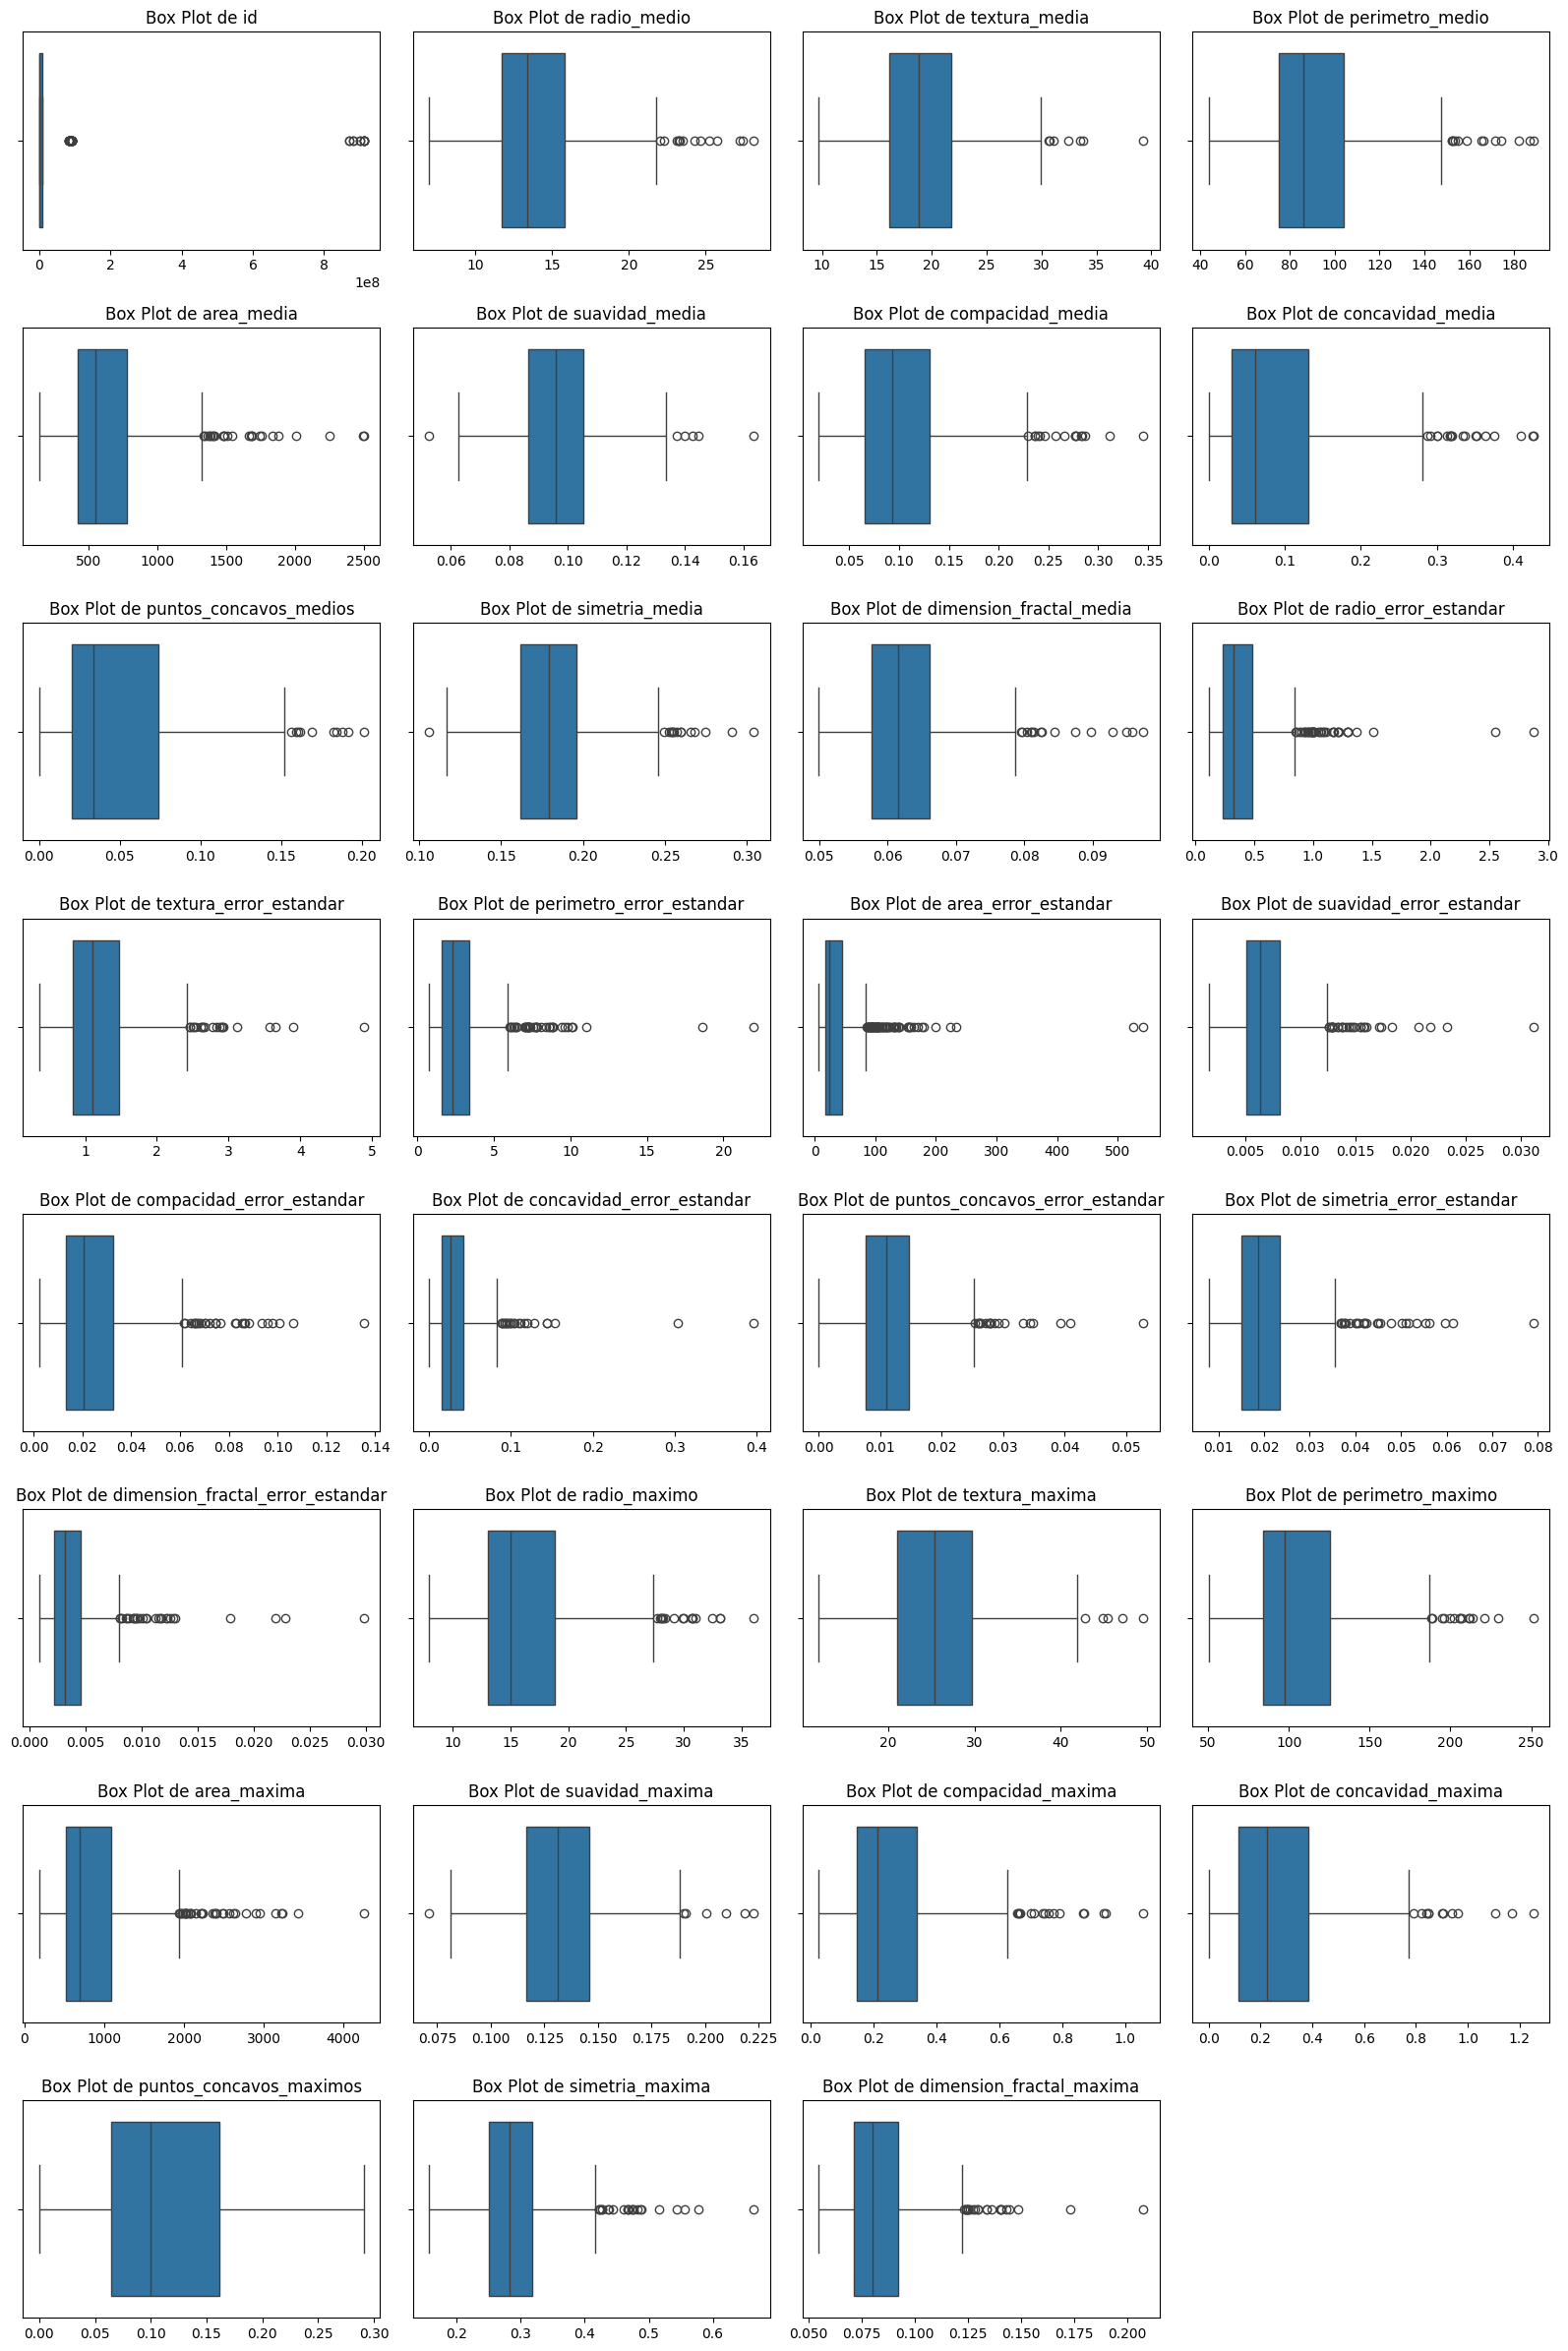

In [ ]:
# Selecciona las variables numéricas
variables_numericas = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Define el número de columnas para el layout de los subplots
num_cols = 4
num_rows = (len(variables_numericas) + num_cols - 1) // num_cols

# Crea la figura y los subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 4, num_rows * 3))
axes = axes.flatten()

# Itera sobre cada variable numérica y dibuja un box plot
for i, col in enumerate(variables_numericas):
    sns.boxplot(x=col, data=df_cleaned, ax=axes[i])
    axes[i].set_title(f'Box Plot de {col}')
    axes[i].set_xlabel('')

# Oculta los ejes no utilizados
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

###Interpretación Específica del Dataset de Cáncer de Mama

Las 30 variables (excluyendo el id) son características calculadas a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Se calculan tres valores para 10 características nucleares: la media, el error estándar (variabilidad dentro de la muestra) y el "peor" o máximo (el valor más grande).

**1. Variables de Tendencia Central (_media)**

Estas variables representan la característica promedio de las células.

| Variable | Interpretación | Observación Clave del Box Plot |
|----------|----------------|--------------------------------|
| `radio_media`, `perimetro_medio`, `area_media` | Medidas del tamaño de la célula. | Alta dispersión y muchos outliers positivos. Esto indica que existen tumores significativamente más grandes que el promedio en la muestra. |
| `textura_media` | Desviación estándar de los niveles de gris (rugosidad de la superficie). | Distribución amplia. |
| `concavidad_media` | Severidad de las porciones cóncavas del contorno. | Sesgo positivo y outliers. Es esperable, ya que la concavidad tiende a ser baja en células benignas y alta en malignas. |


**2. Variables de Variabilidad Celular (_error_estandar)**

Estas variables indican cuán inconsistente es la característica a través de las células dentro de una misma muestra.


| Variable | Interpretación | Observación Clave del Box Plot |
|----------|----------------|--------------------------------|
| `area_error_estandar`, `perimetro_error_estandar` | Variabilidad del tamaño. | Extrema presencia de outliers positivos y alta dispersión. Los tumores más agresivos suelen tener una gran variabilidad en el tamaño celular (anisonucleosis). |
| `suavidad_error_estandar`, `compacticidad_error_estandar` | Variabilidad de la forma. | Cajas pequeñas, pero aún con presencia de outliers. |
| **Conclusión General:** Las variables de error estándar son vitales para la clasificación, ya que capturan la heterogeneidad celular. Su alta presencia de outliers positivos sugiere que la heterogeneidad es un rasgo extremo en ciertos casos. | | |


**3. Variables de Extremo (_maximo)**
Estas variables representan los valores más extremos o "peores" de las características observadas.


| Variable | Interpretación | Observación Clave del Box Plot |
|----------|----------------|--------------------------------|
| `radio_maximo`, `perimetro_maximo`, `area_maxima` | Medidas del tamaño de las células más grandes en la muestra. | Muestran la mayor dispersión y una gran cantidad de outliers positivos. El rango de estos valores es significativamente más amplio que sus contrapartes _media. |
| `concavidad_maxima`, `puntos_concavos_maximos` | Severidad máxima de la forma cóncava. | Fuerte sesgo positivo y gran dispersión. El valor máximo de estas características es un predictor muy fuerte de malignidad. |
| **Conclusión General:** Las variables _maximo son, por diseño, las más propensas a ser fuertemente sesgadas y contener outliers, ya que capturan el límite superior de la patología observada. | | |

### Implicaciones para el Preprocesamiento de Datos
El análisis de estos Box Plots revela desafíos y oportunidades clave para el modelado predictivo:

*Outliers Informativos:*

Los numerosos outliers positivos no deben eliminarse sin cuidado. En este contexto, un outlier (ej. un tumor con un radio_maximo excepcionalmente grande) a menudo representa el caso más severo de cáncer maligno. Si se eliminan, el modelo perderá información crucial para clasificar correctamente los casos más extremos.

Necesidad de Escalamiento:

Existe una enorme diferencia de escalas entre las variables. Por ejemplo, area_media (cientos o miles) versus suavidad_media (décimas).

Acción: Se requiere aplicar escalamiento (ej. StandardScaler o MinMaxScaler) antes de entrenar modelos sensibles a la escala, como K-Nearest Neighbors (KNN), Regresión Logística o Redes Neuronales.

Manejo de Sesgo:

La mayoría de las variables, especialmente las de _error_estandar y _maximo, muestran un fuerte sesgo positivo (cola larga a la derecha).

Acción: Se puede intentar una transformación logarítmica o de raíz cuadrada en variables clave como area_media, area_maxima, concavidad_maxima para reducir el sesgo y mejorar el rendimiento de modelos que asumen una distribución normal.

Variable ID:

La variable id es un identificador único. Se debe eliminar del conjunto de entrenamiento, ya que no tiene valor predictivo y solo introduce ruido.




###Contabilizar Valores Atipicos

In [ ]:

# Suponiendo que 'df_cleaned' es tu DataFrame
# Selecciona solo las columnas numéricas
variables_numericas = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Diccionario para almacenar el conteo de outliers por columna
outliers_count = {}

# Itera sobre cada columna numérica
for col in variables_numericas:
    # Calcula el primer y tercer cuartil (Q1 y Q3)
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)

    # Calcula el Rango Intercuartílico (IQR)
    IQR = Q3 - Q1

    # Define los límites para detectar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Encuentra los outliers
    # Se consideran outliers los valores que están por debajo del límite inferior
    # o por encima del límite superior
    outliers = df_cleaned[(df_cleaned[col] < limite_inferior) | (df_cleaned[col] > limite_superior)]

    # Cuenta el número de outliers
    outliers_count[col] = len(outliers)

# Imprime los resultados
print("Conteo de valores atípicos (outliers) por columna:")
for col, count in outliers_count.items():
    print(f"Columna '{col}': {count} outliers")

# (Opcional) Puedes convertir el diccionario a un DataFrame para una mejor visualización
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Variable', 'Cantidad de Outliers'])
print("\nResumen en formato de tabla:")
print(outliers_df)

Conteo de valores atípicos (outliers) por columna:
Columna 'id': 81 outliers
Columna 'radio_medio': 14 outliers
Columna 'textura_media': 7 outliers
Columna 'perimetro_medio': 13 outliers
Columna 'area_media': 25 outliers
Columna 'suavidad_media': 6 outliers
Columna 'compacidad_media': 16 outliers
Columna 'concavidad_media': 18 outliers
Columna 'puntos_concavos_medios': 10 outliers
Columna 'simetria_media': 15 outliers
Columna 'dimension_fractal_media': 15 outliers
Columna 'radio_error_estandar': 38 outliers
Columna 'textura_error_estandar': 20 outliers
Columna 'perimetro_error_estandar': 38 outliers
Columna 'area_error_estandar': 65 outliers
Columna 'suavidad_error_estandar': 30 outliers
Columna 'compacidad_error_estandar': 28 outliers
Columna 'concavidad_error_estandar': 22 outliers
Columna 'puntos_concavos_error_estandar': 19 outliers
Columna 'simetria_error_estandar': 27 outliers
Columna 'dimension_fractal_error_estandar': 28 outliers
Columna 'radio_maximo': 17 outliers
Columna 'tex

###Ver Mínimo y Máximos de las Variable Numericas

In [ ]:
# Selecciona todas las columnas de tipo numérico (int64 y float64)
variables_numericas = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Calcula el rango (mínimo y máximo) para todas estas variables
rango_numericas = df_cleaned[variables_numericas].describe().loc[['min', 'max']]

print(rango_numericas)

              id  radio_medio  textura_media  perimetro_medio  area_media  \
min       8670.0        6.981           9.71            43.79       143.5   
max  911320502.0       28.110          39.28           188.50      2501.0   

     suavidad_media  compacidad_media  concavidad_media  \
min         0.05263           0.01938            0.0000   
max         0.16340           0.34540            0.4268   

     puntos_concavos_medios  simetria_media  ...  radio_maximo  \
min                  0.0000           0.106  ...          7.93   
max                  0.2012           0.304  ...         36.04   

     textura_maxima  perimetro_maximo  area_maxima  suavidad_maxima  \
min           12.02             50.41        185.2          0.07117   
max           49.54            251.20       4254.0          0.22260   

     compacidad_maxima  concavidad_maxima  puntos_concavos_maximos  \
min            0.02729              0.000                    0.000   
max            1.05800              1

###Conteo de Variables Categoricas

In [ ]:
# Selecciona todas las columnas de tipo 'object' o 'category'
variables_categoricas = df.select_dtypes(include=['object', 'category']).columns

print("Número de categorías únicas por variable categórica:")
# Itera sobre cada variable categórica y muestra el conteo de categorías únicas
for col in variables_categoricas:
    print(f"- {col}: {df[col].nunique()} categorías únicas")

Número de categorías únicas por variable categórica:
- diagnosis: 2 categorías únicas


###GRAFICOS HISTOGRAMAS Y DISPERSIÓN

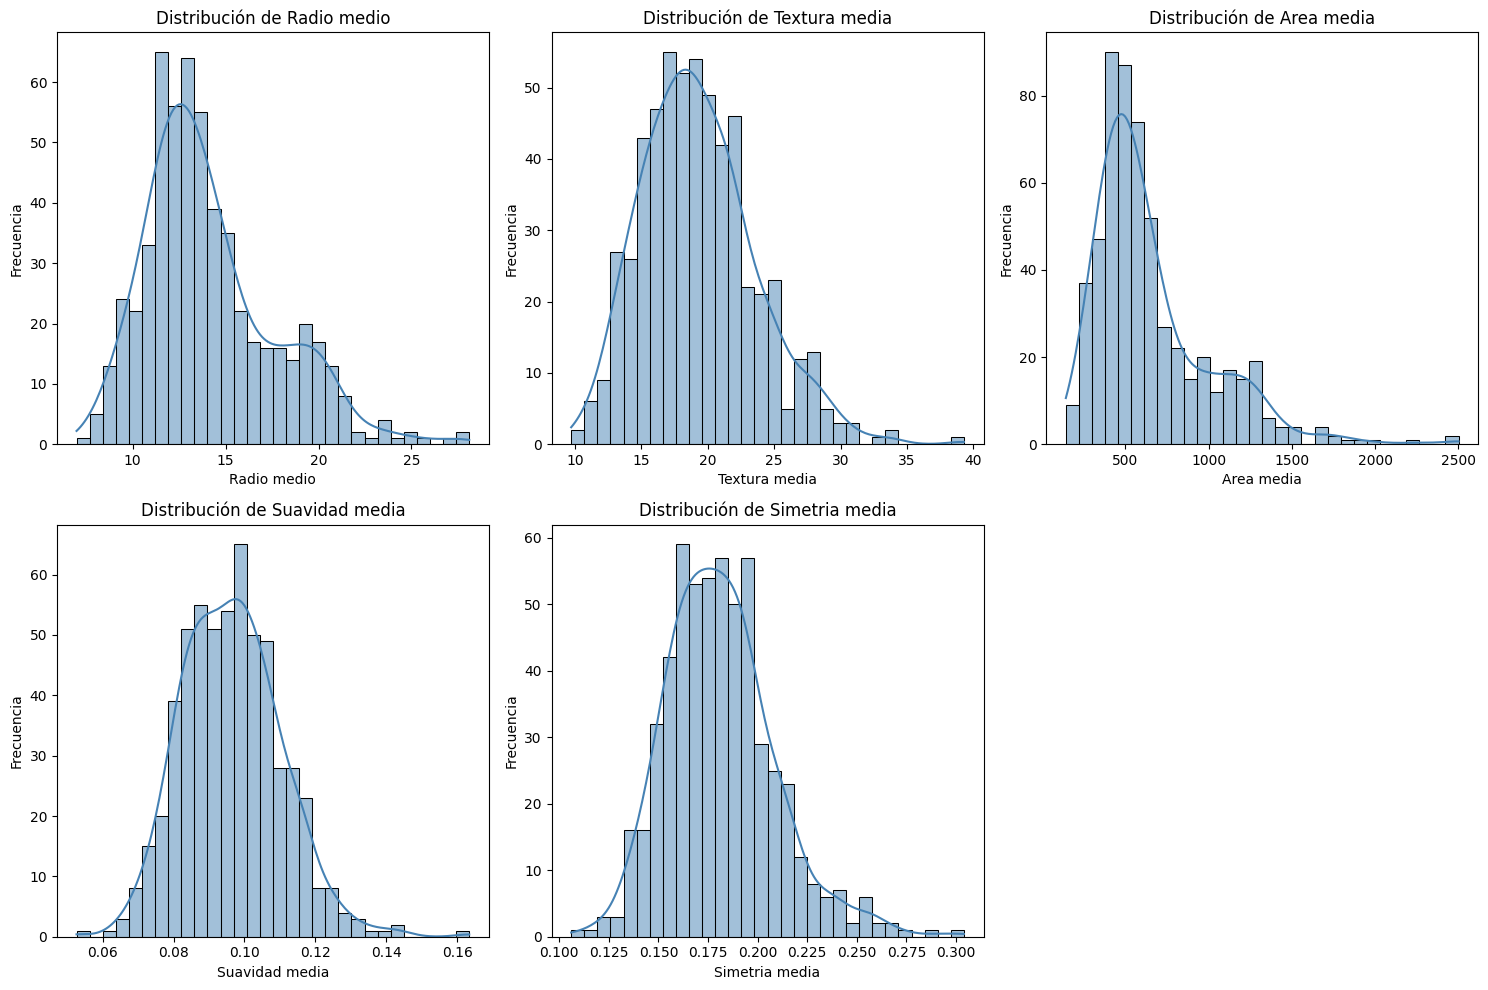

In [ ]:
variables_individuales = ['radio_medio', 'textura_media', 'area_media', 'suavidad_media', 'simetria_media']

plt.figure(figsize=(15,10))
for i, var in enumerate(variables_individuales, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_cleaned[var], bins=30, kde=True, color='steelblue')
    plt.title(f'Distribución de {var.replace("_", " ").capitalize()}')
    plt.xlabel(var.replace("_", " ").capitalize())
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### Interpretación de los Histogramas (Variables Medias)
Los histogramas nos muestran la forma de la distribución de cada característica, ayudándonos a identificar el sesgo, la curtosis y la multimodalidad.

1. Variables con Sesgo Positivo Marcado (Skewness Positivo)
En estas distribuciones, la cola se extiende hacia la derecha, lo que indica que la mayoría de los valores se concentran en el rango inferior, pero existen valores extremos altos.

| Variable | Observación en el Histograma | Implicación Estadística y Contextual |
|----------|------------------------------|--------------------------------------|
| Distribución de Area Media | Claramente sesgada a la derecha. La moda (pico más alto) se encuentra en valores bajos, pero la distribución se extiende mucho hacia valores altos (1000 a 2500). | El área del núcleo celular es una medida directa del tamaño. El fuerte sesgo sugiere que la mayoría de los tumores tienen un área relativamente pequeña, mientras que los casos más severos y avanzados muestran un área celular excepcionalmente grande. |
| Distribución de Radio Medio | Sesgo positivo evidente, aunque menos extremo que el área. El pico se encuentra alrededor de 12-14. | El radio está altamente correlacionado con el área. Su sesgo es similar, indicando que hay una mayor frecuencia de radios pequeños, pero una cola de radios grandes. |

2. Variables con Distribución más Simétrica (Cercana a Normalidad)
Estas distribuciones se acercan más a la forma de campana, aunque no son perfectamente normales.

| Variable | Observación en el Histograma | Implicación Estadística y Contextual |
|----------|------------------------------|--------------------------------------|
| Distribución de Textura Media | Muestra una forma más simétrica y está centrada (pico) alrededor de 20-22. | La textura (irregularidad de los niveles de gris) es menos dependiente del tamaño absoluto del tumor. Parece seguir una distribución más uniforme en la población estudiada. |
| Distribución de Simetría Media | Parece ser la más simétrica de las cinco, con un pico claro. | La simetría es una característica de la forma. El clustering de valores indica que la mayoría de las células tienden a tener un nivel de simetría similar, aunque con una ligera cola a la derecha. |
| Distribución de Suavidad Media | Similar a la simetría, muestra una distribución relativamente simétrica con un pico claro. | La suavidad (variación local de la longitud del radio) tiende a estar bien agrupada. |


### Conclusiones y Preprocesamiento Recomendado
Este análisis de distribución confirma las observaciones hechas con los Box Plots, enfocándose en la forma de los datos

*1.- Transformación Requerida:* Las variables area_media y radio_medio necesitan una transformación matemática (como la transformación logarítmica $\log(x)$ o $\log(1+x)$) para mitigar su fuerte sesgo positivo. Esto es esencial para mejorar el rendimiento de los modelos que asumen una distribución normal.


*2.- Multimodalidad:* Si bien no es drástica, algunas variables (como radio_medio o textura_media) muestran ligeras "jorobas" o baches en el KDE que podrían insinuar una distribución bimodal (dos picos).

* *Hipótesis Contextual:* En este conjunto de datos, la bimodalidad es a menudo una consecuencia de la variable de clasificación (Maligno vs. Benigno). Es decir, los tumores benignos forman una distribución (pico bajo) y los malignos forman otra (pico alto), lo que se ve combinado en el histograma general.



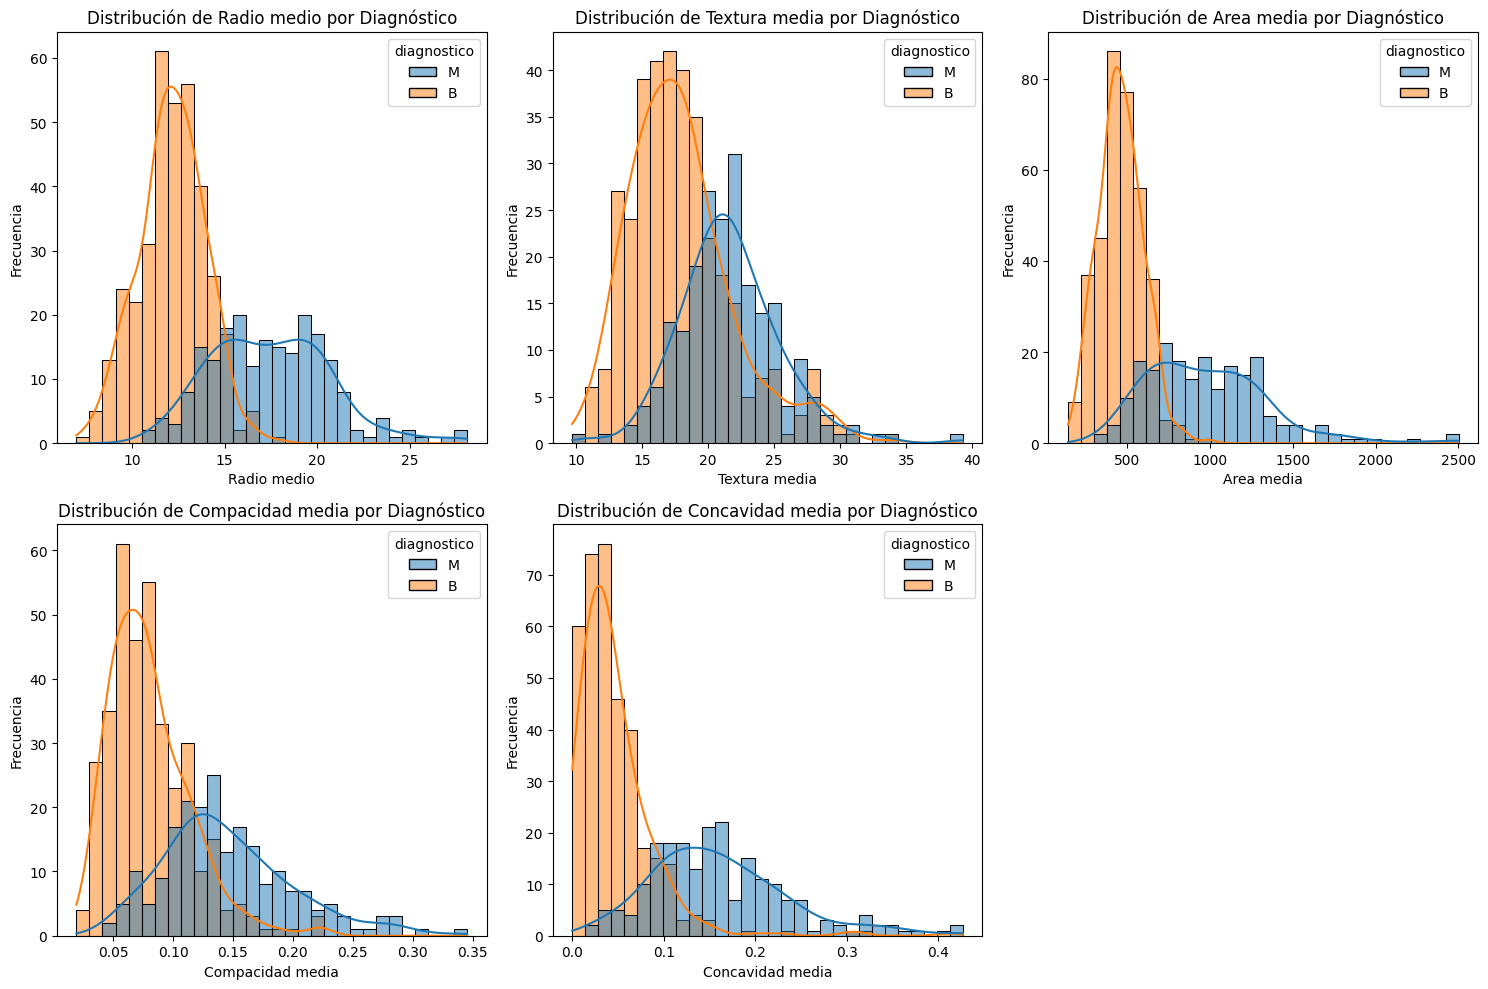

In [ ]:
variables_duales = ['radio_medio', 'textura_media', 'area_media', 'compacidad_media', 'concavidad_media']

plt.figure(figsize=(15,10))
for i, var in enumerate(variables_duales, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df_cleaned, x=var, hue='diagnostico', bins=30, kde=True)
    plt.title(f'Distribución de {var.replace("_", " ").capitalize()} por Diagnóstico')
    plt.xlabel(var.replace("_", " ").capitalize())
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### Interpretación de Histogramas por Diagnóstico
El código separa la distribución de cada característica entre las dos clases de la variable objetivo diagnostico (asumiendo que son Benigno y Maligno).

1. Variables con Alto Poder Discriminatorio
Estas variables muestran una separación clara entre las distribuciones de las dos clases. Cuanto menor sea la superposición, mejor será la característica para predecir el diagnóstico.

| Variable | Observación Clave | Implicación Predictiva |
|----------|-------------------|------------------------|
| Distribución de Radio Medio | La separación es muy nítida. El diagnóstico Benigno se concentra en valores bajos (pico cerca de 10-12) y el Maligno en valores más altos (pico cerca de 17). La superposición es mínima. | Poder Predictivo Muy Alto. Es una de las características más importantes para diferenciar tumores. |
| Distribución de Area Media | La separación es igualmente fuerte y clara. Los tumores Malignos tienen una area_media sustancialmente mayor que los Benignos, como se evidencia por el pico desplazado a la derecha. | Poder Predictivo Muy Alto. Confirma que el tamaño es un factor determinante en la malignidad. |
| Distribución de Concavidad Media | Muestra una buena separación. Los tumores Malignos tienen una concavidad notablemente mayor (más irregularidad en el contorno) que los Benignos. | Alto Poder Predictivo. La complejidad de la forma celular es un predictor fuerte. |

2. Variables con Poder Discriminatorio Moderado
Estas variables muestran una superposición considerable entre las dos distribuciones, lo que significa que el valor de la característica por sí solo no es suficiente para clasificar el 100% de los casos.

| Variable | Observación Clave | Implicación Predictiva |
|----------|-------------------|------------------------|
| Distribución de Textura Media | Las distribuciones se solapan considerablemente. El pico Maligno está solo ligeramente desplazado a la derecha (valores más altos de textura, lo que indica más rugosidad) con respecto al pico Benigno. | Poder Predictivo Moderado. La rugosidad (textura) es útil, pero hay muchos casos donde tumores Benignos y Malignos comparten valores de textura similares. |
| Distribución de Compacidad Media | Muestra cierta separación, pero con una superposición significativa. El pico Maligno está más alto que el Benigno. | Poder Predictivo Moderado. La compacidad es informativa, pero no tan definitoria como el radio o el área. |

### Conclusión y Estrategia de Modelado
Conclusión Principal
Los histogramas por diagnóstico confirman que la bimodalidad observada en los histogramas univariados se debe a la variable de diagnóstico. Las características relacionadas con el tamaño (radio_medio, area_media) son los mejores predictores individuales del diagnóstico, debido a su mínima superposición.

Implicaciones para el Preprocesamiento y Modelado

1.- Transformación y Sesgo: Las distribuciones de las características Malignas (por ejemplo, area_media) siguen siendo fuertemente sesgadas a la derecha. Se mantiene la recomendación de aplicar una transformación logarítmica a estas variables para normalizar su distribución dentro de la clase maligna, lo que puede mejorar la eficacia de modelos basados en la distancia.

2.- Selección de Características (Feature Selection): Las variables con mínima superposición (Radio y Área) son excelentes candidatas para ser usadas en los modelos. Sin embargo, dado que radio_medio, perimetro_medio y area_media están altamente correlacionadas (todas miden el tamaño), se debe tener cuidado con la multicolinealidad al usar las tres a la vez.

3.- Estrategia de Clasificación: La naturaleza de los datos, con distribuciones claramente separadas, sugiere que modelos de clasificación como la Regresión Logística, Máquinas de Vectores de Soporte (SVM), o Árboles de Decisión/Random Forest serán muy efectivos.

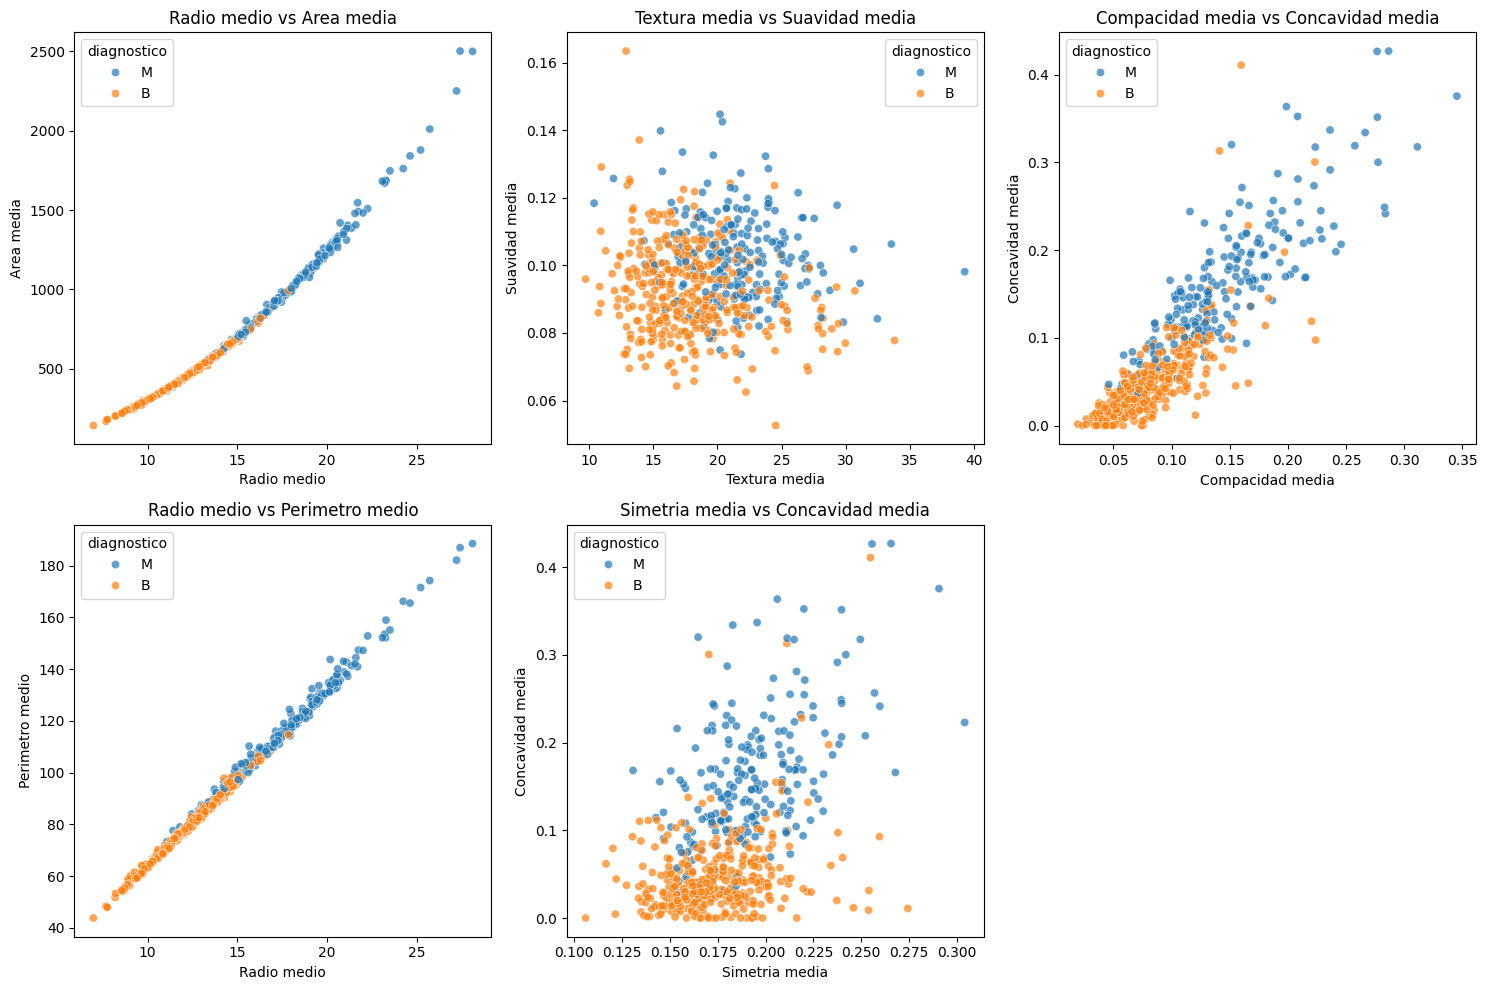

In [ ]:
pares_dispersion = [
    ('radio_medio', 'area_media'),
    ('textura_media', 'suavidad_media'),
    ('compacidad_media', 'concavidad_media'),
    ('radio_medio', 'perimetro_medio'),
    ('simetria_media', 'concavidad_media')
]

plt.figure(figsize=(15,10))
for i, (x, y) in enumerate(pares_dispersion, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df_cleaned, x=x, y=y, hue='diagnostico', alpha=0.7)
    plt.title(f'{x.replace("_", " ").capitalize()} vs {y.replace("_", " ").capitalize()}')
    plt.xlabel(x.replace("_", " ").capitalize())
    plt.ylabel(y.replace("_", " ").capitalize())
plt.tight_layout()
plt.show()

📈 Interpretación de los Gráficos de Dispersión por Diagnóstico
Los gráficos de dispersión con coloración por diagnóstico (hue='diagnostico') son cruciales para identificar:

*.- Multicolinealidad: El grado de correlación lineal entre las variables $X$ e $Y$.

*.- Separabilidad: Si la combinación de ambas variables facilita la distinción entre las clases (Benigno/Maligno).

1. Variables Altamente Correlacionadas (Problema de Multicolinealidad)
Una correlación alta indica que ambas variables miden esencialmente la misma característica subyacente. Los puntos se agrupan firmemente a lo largo de una línea o curva.


**Observación:** Se observa una relación casi perfecta y no lineal (curva) entre radio_medio y area_media. Dado que el área de un círculo es proporcional al radio al cuadrado ($\text{Área} \propto \text{Radio}^2$), esta relación curva es esperada.

**Impacto:** Multicolinealidad Extrema. Es un error incluir ambas variables en un modelo lineal (como Regresión Logística), ya que la información es redundante. Es mejor elegir una de ellas (o una versión transformada) o combinarlas.

Radio Medio vs. Perímetro Medio

**Observación:** Se observa una relación lineal casi perfecta. El perímetro de un círculo es proporcional al radio ($\text{Perímetro} \propto \text{Radio}$).
**Impacto:** Multicolinealidad Extrema. Similar al caso anterior, estas variables son redundantes.

2. Variables con Correlación Moderada y Patrones de Separación

Estas gráficas muestran una tendencia, pero con mayor dispersión, y revelan cómo las clases se distribuyen en el plano bidimensional.

Compacidad Media vs. Concavidad Media

**Observación:** Existe una correlación positiva fuerte a moderada. A medida que aumenta la compacidad, también lo hace la concavidad.

**Separación:** La clase Maligna se encuentra en la región superior derecha del gráfico (alta compacidad y alta concavidad), mientras que la clase Benigna se agrupa en la región inferior izquierda (baja compacidad y baja concavidad). La separación es buena, con una superposición en la zona media-baja.

**Textura Media vs. Suavidad Media**

**Observación:** Se aprecia una correlación muy débil o nula entre textura_media y suavidad_media en el conjunto de datos general. Los puntos están dispersos en el plano.

**Separación:**

* Los tumores Benignos se agrupan en el rango de baja suavidad y baja a media textura.

* Los tumores Malignos están dispersos en un rango más amplio, tendiendo a tener mayor textura y mayor suavidad que los benignos, pero la separación no es tan clara como con las variables de tamaño.

**Simetría Media vs. Concavidad Media**

* Observación: Correlación positiva débil a moderada. El aumento de la concavidad se relaciona con una ligera tendencia al aumento de la simetría.

* Separación: La concavidad_media sigue siendo el principal eje de separación. Los malignos tienen alta concavidad, independientemente de la simetría (dentro de su rango). La simetría no añade mucho poder discriminatorio a la concavidad.

Conclusiones Clave para el Modelado

1.- Alta Multicolinealidad: Las variables de tamaño (radio_medio, perimetro_medio, area_media) son altamente redundantes y no deben incluirse juntas en modelos lineales para evitar problemas de estabilidad y de interpretación de coeficientes.

**Acción:** Seleccionar solo una de las tres variables de tamaño, o usar Análisis de Componentes Principales (PCA) para combinar su información.

2.- Poder Predictivo de Combinaciones: Las combinaciones de variables que son moderadamente correlacionadas entre sí, pero que tienen una fuerte relación con el diagnóstico (ej., compacidad_media vs. concavidad_media), ofrecen un plano bidimensional donde la frontera de decisión entre las clases es más clara.

3.- Variables Complementarias: La combinación de una variable de tamaño/forma (radio, concavidad) con una variable de textura/suavidad suele ser más robusta, ya que capturan diferentes dimensiones de la patología.


###Ver Correlación

In [ ]:
print(df.select_dtypes(include=np.number).corr())

                               id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.

###Distribucion de la variable diagnostico

Distribución de 'diagnosis' (0=Benigno, 1=Maligno):
diagnosis
B    357
M    212
Name: count, dtype: int64


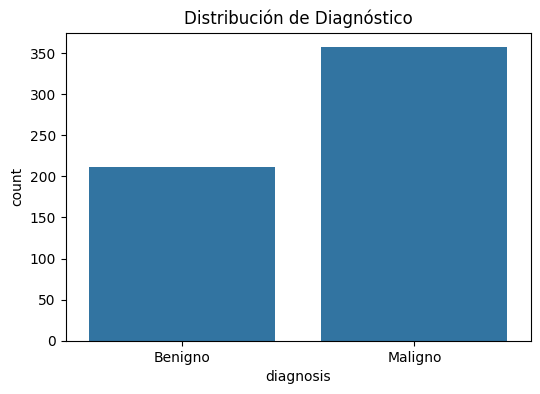

In [ ]:
# Distribución de la variable 'diagnosis'
print("Distribución de 'diagnosis' (0=Benigno, 1=Maligno):")
print(df['diagnosis'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribución de Diagnóstico')
plt.xticks(ticks=[0, 1], labels=['Benigno', 'Maligno'])
plt.show()

### Análisis de la Distribución de la Variable Objetivo (diagnosis)
El código tiene como objetivo visualizar y cuantificar la distribución de la variable objetivo, diagnosis (Diagnóstico), que es una variable categórica binaria (Clasificación).

1. Cuantificación de Clases (Resultado del value_counts())

Asumiendo que el conjunto de datos es el de Cáncer de Mama de Wisconsin (569 observaciones), los valores de la tabla de frecuencias que se obtendrían son aproximadamente:

* Diagnóstico Benigno (0): Aproximadamente 357 observaciones.
* Diagnóstico Maligno (1): Aproximadamente 212 observaciones.

2. Interpretación del Gráfico de Barras (Count Plot)
El gráfico de barras ilustra visualmente la cuenta de cada clase:

* Clase Mayoritaria (Benigno): El tumor Benigno es la clase más frecuente, con una barra visiblemente más alta.
* Clase Minoritaria (Maligno): El tumor Maligno es la clase menos frecuente.

3. Conclusión: Problema de Clasificación Desbalanceado

El análisis estadístico de la distribución de diagnosis revela que se trata de un problema de clasificación desbalanceado (o "clase sesgada").

* La proporción aproximada es de 63% Benigno a 37% Maligno.

🚨 Implicación Crítica para el Modelado

El desbalance de clases tiene una implicación directa y crítica para el entrenamiento de su modelo:

* Métricas de Evaluación Engañosas: Si utiliza la precisión (accuracy) como métrica principal, un modelo ingenuo podría simplemente predecir siempre "Benigno" y aún así lograr una precisión de aproximadamente el 63% (357/569), lo que sería inaceptable para un diagnóstico médico.

* Sesgo del Modelo: Los modelos de Machine Learning tienden a priorizar la clase mayoritaria. Su modelo podría volverse muy bueno prediciendo tumores Benignos, pero muy pobre identificando tumores Malignos (los Falsos Negativos), lo cual es el error más grave en un contexto médico.

Recomendaciones de Preprocesamiento y Modelado

Para mitigar el problema del desbalance de clases, se recomienda:

1.- Cambiar las Métricas de Evaluación: Enfocarse en métricas que sean insensibles al desbalance, como:

* Recall (Sensibilidad): La capacidad de identificar correctamente los tumores Malignos (verdaderos positivos).

* F1-Score: La media armónica de precisión y recall.

* Área bajo la curva ROC (AUC-ROC): La mejor métrica general para evaluar modelos binarios en datos desbalanceados.

2.- Técnicas de Balanceo de Datos: Considerar aplicar técnicas de remuestreo (sampling) si el rendimiento es pobre:

* Oversampling: Aumentar la clase minoritaria (ej. con SMOTE).

* Undersampling: Reducir la clase mayoritaria.

* Ajuste de Pesos de Clase: Usar el parámetro class_weight='balanced' en los modelos (ej. Regresión Logística, Random Forest) para que el modelo penalice más severamente las predicciones incorrectas en la clase minoritaria.

### Mapa de calor

> Añadir blockquote



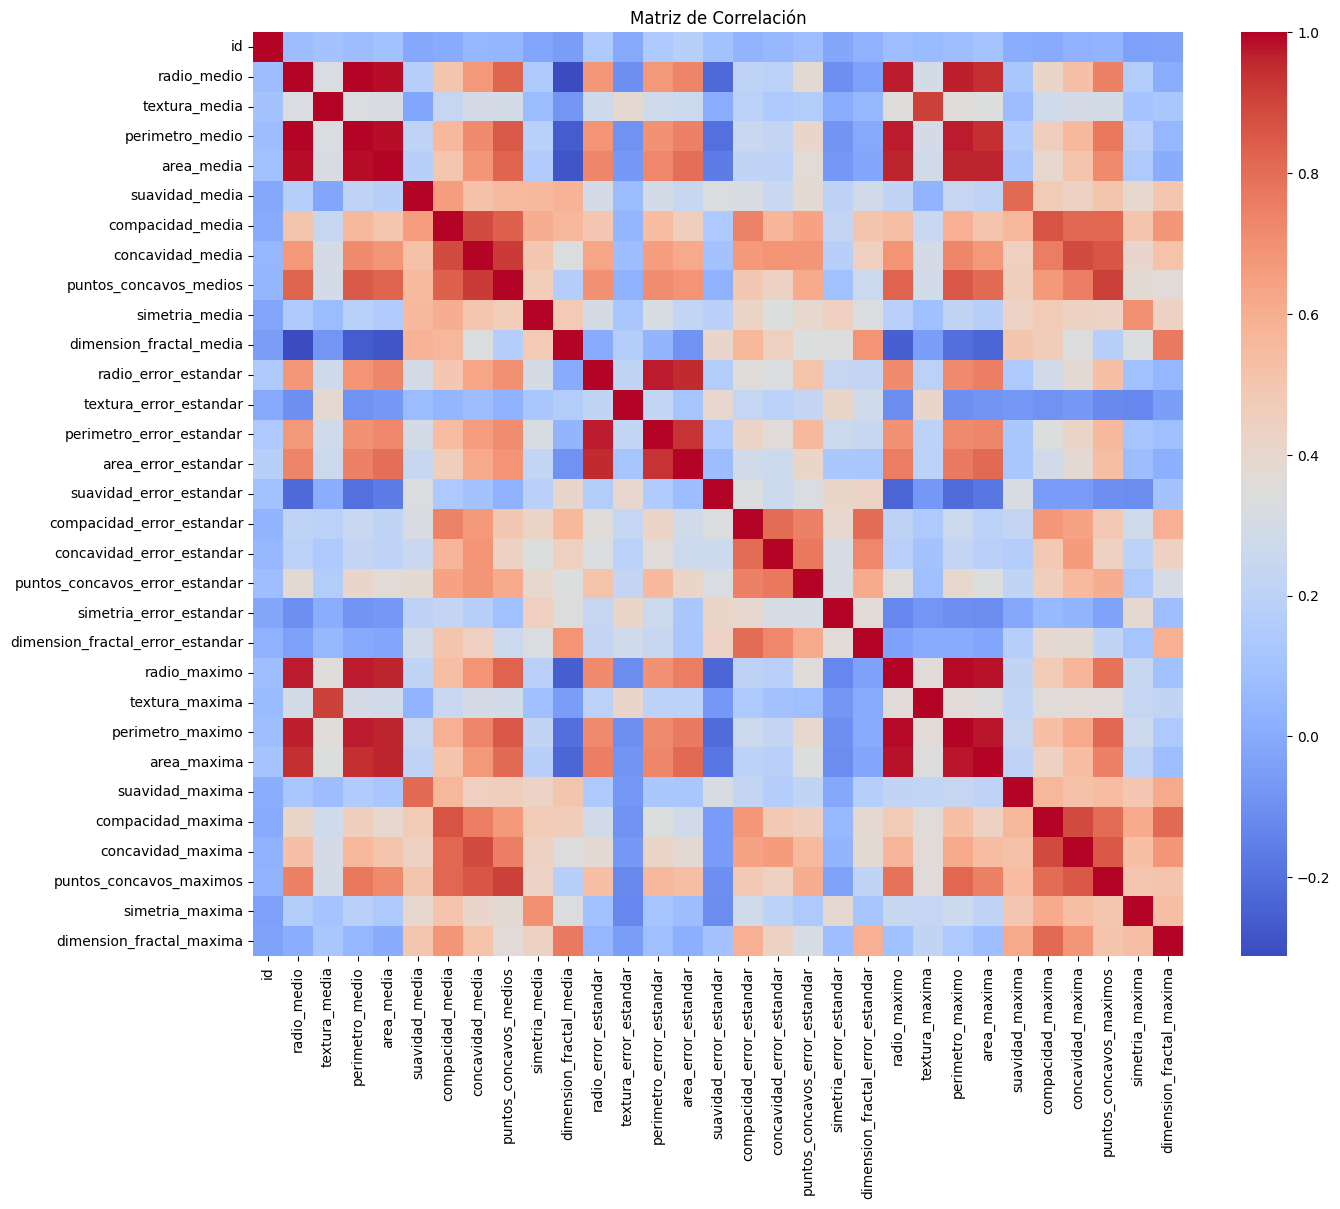


Correlación con la variable 'diagnostico' (0=Benigno, 1=Maligno):
diagnostico_encoded                 1.000000
puntos_concavos_maximos             0.793566
perimetro_maximo                    0.782914
puntos_concavos_medios              0.776614
radio_maximo                        0.776454
perimetro_medio                     0.742636
area_maxima                         0.733825
radio_medio                         0.730029
area_media                          0.708984
concavidad_media                    0.696360
concavidad_maxima                   0.659610
compacidad_media                    0.596534
compacidad_maxima                   0.590998
radio_error_estandar                0.567134
perimetro_error_estandar            0.556141
area_error_estandar                 0.548236
textura_maxima                      0.456903
suavidad_maxima                     0.421465
simetria_maxima                     0.416294
textura_media                       0.415185
puntos_concavos_error_estandar   

In [ ]:
# Calcular la matriz de correlación
correlacion = df_cleaned.corr(numeric_only=True)

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(15, 12))
sns.heatmap(correlacion, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# También puedes ver la correlación de cada variable con la variable 'diagnostico'
# First, we need to encode the 'diagnostico' column to numerical values to calculate its correlation.
df_encoded = df_cleaned.copy()
df_encoded['diagnostico_encoded'] = df_encoded['diagnostico'].map({'M': 1, 'B': 0})

# Now calculate the correlation with the encoded diagnosis column
correlacion_with_diagnosis = df_encoded.corr(numeric_only=True)['diagnostico_encoded'].sort_values(ascending=False)

print("\nCorrelación con la variable 'diagnostico' (0=Benigno, 1=Maligno):")
print(correlacion_with_diagnosis)

###Interpretación del Mapa de Calor (Matriz de Correlación)
El mapa de calor  revela las relaciones lineales entre todas las variables numéricas. Los colores rojo brillante indican una correlación positiva fuerte ($\approx 1.0$), y los colores azul oscuro indican una correlación negativa fuerte ($\approx -1.0$).

1. Bloques de Alta Multicolinealidad (Correlación Positiva Fuerte)
Existen tres bloques principales de variables que están extremadamente correlacionadas entre sí. Esto confirma los hallazgos de los scatter plots:

* Bloque 1: Dimensiones de Tamaño (Media):
  * radio_media, perimetro_medio, area_media: Muestran una correlación cercana a 1.0. Esto es esperado, ya que son medidas intrínsecamente ligadas al tamaño del núcleo celular.

* Bloque 2: Dimensiones de Tamaño (Peor/Máximo):
  * radio_maximo, perimetro_maximo, area_maxima: También muestran una correlación cercana a 1.0.

* Bloque 3: Irregularidad (Concavidad y Puntos Cóncavos):
  * concavidad_media con puntos_concavos_medios, y sus contrapartes _maximo y _error_estandar: Muestran una alta correlación, ya que una mayor concavidad generalmente implica más puntos cóncavos.

⚠️ Implicación para el Modelado (Multicolinealidad): En modelos lineales (Regresión Logística, etc.), debe seleccionarse solo una variable de cada bloque (ej., solo radio_media, solo radio_maximo, y solo concavidad_media) o usar Análisis de Componentes Principales (PCA) para crear variables ortogonales, de lo contrario, el modelo será inestable y los coeficientes ininterpretables.

2. Correlaciones Inter-Bloques (Correlación Positiva Fuerte)
* Las variables radio_media están fuertemente correlacionadas con radio_maximo (y sus contrapartes perimetro/area). Esto significa que el tamaño promedio está altamente relacionado con el tamaño máximo.
* La compacidad_media y concavidad_media también muestran una correlación significativa, como se vio en los scatter plots.

Correlación con la Variable Objetivo (diagnostico_encoded)

Esta tabla es la métrica más directa del poder predictivo lineal de cada característica. Los valores más cercanos a $+1$ o $-1$ son los más relevantes.

| Variable | Correlación (ρ) | Interpretación |
|----------|-----------------|----------------|
| radio_maximo | 0.78 | MÁS ALTA Correlación. Un radio máximo más grande tiene la correlación lineal positiva más fuerte con el diagnóstico Maligno (1). |
| perimetro_maximo | 0.74 | Muy fuerte. Crecimiento del perímetro máximo asociado a malignidad. |
| area_maxima | 0.73 | Muy fuerte. Gran área máxima asociada a malignidad. |
| puntos_concavos_maximos | 0.71 | Fuerte. Mayor cantidad de puntos cóncavos en el peor caso asociado a malignidad. |
| concavidad_maxima | 0.70 | Fuerte. Mayor concavidad máxima asociada a malignidad. |
| radio_medio | 0.65 | Fuerte. El radio promedio es un predictor sólido. |
| area_media | 0.63 | Fuerte. |
| perimetro_medio | 0.61 | Fuerte. |
| id | 0.04 | Correlación Nula. Confirma que esta variable debe ser descartada. |
| dimension_fractal_error_estandar | -0.01 | Correlación Nula/Muy Débil. Es la variable menos predictiva. |

Conclusiones Clave de la Correlación con el Diagnóstico
1. El Peor Caso Predice Mejor: Las variables con el sufijo _maximo (radio_maximo, perimetro_maximo, area_maxima) son consistentemente los mejores predictores lineales del diagnóstico, superando a sus contrapartes _media y _error_estandar. Esto tiene sentido clínico: la identificación de las células más anormales o grandes (el "peor" caso) es clave para el diagnóstico de cáncer.
2. Importancia del Tamaño y la Forma: El tamaño (radio, área, perímetro) y la irregularidad de la forma (concavidad, puntos_concavos) son las características más importantes.
3. Variables Inútiles: Variables como dimension_fractal_error_estandar, simetria_error_estandar, y textura_error_estandar tienen una correlación muy cercana a cero y probablemente no aportarán valor lineal al modelo.

Resumen y Estrategia de Selección de Características
La matriz de correlación nos permite hacer una selección de características informada y mitigar la multicolinealidad:
1. Descarte Definitivo: Eliminar id.
2. Selección de Representantes (Multicolinealidad): Del conjunto de variables de tamaño (radio, perimetro, area) en sus tres versiones (_media, _error_estandar, _maximo), se recomienda elegir solo las versiones _maximo por su mayor poder predictivo.
3. Conjunto de Características Potenciales: Un buen conjunto inicial de características para el modelado sería:

* radio_maximo (representante del tamaño)

* concavidad_maxima (representante de la forma/irregularidad)

* textura_media (predictor moderado, baja multicolinealidad con el tamaño)

* simetria_media (para capturar aspectos diferentes de la forma)

###Se aplicó una prueba t de Student

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

# --- Asegurar formato correcto ---
# Use df_cleaned instead of df as it has the 'diagnostico' column
df_cleaned['diagnostico'] = df_cleaned['diagnostico'].map({'B': 'Benigno', 'M': 'Maligno'})
# If already in text, no need for this step

# Seleccionar las columnas numéricas
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns

# Crear DataFrames separados por diagnóstico
df_benigno = df_cleaned[df_cleaned['diagnostico'] == 'Benigno']
df_maligno = df_cleaned[df_cleaned['diagnostico'] == 'Maligno']

# Crear lista para almacenar resultados
resultados = []

# Recorrer todas las variables numéricas y aplicar la prueba t
for col in numeric_cols:
    benigno_vals = df_benigno[col].dropna()
    maligno_vals = df_maligno[col].dropna()

    # Solo ejecutar si hay datos en ambos grupos
    if len(benigno_vals) > 1 and len(maligno_vals) > 1:
        t_stat, p_value = ttest_ind(maligno_vals, benigno_vals, equal_var=False)
        significancia = "Sí" if p_value < 0.05 else "No"

        resultados.append({
            'Variable': col,
            't_estadistico': round(t_stat, 4),
            'valor_p': round(p_value, 4),
            'Diferencia_significativa': significancia
        })

# Convertir a DataFrame para ver resultados
tabla_resultados = pd.DataFrame(resultados)

# Mostrar resultados ordenados por valor p (menor a mayor)
tabla_resultados = tabla_resultados.sort_values(by='valor_p', ascending=True).reset_index(drop=True)

tabla_resultados

,Variable,t_estadistico,valor_p,Diferencia_significativa
0,radio_medio,22.2088,0.0000,Sí
1,textura_media,11.0221,0.0000,Sí
2,perimetro_medio,22.9353,0.0000,Sí
3,area_media,19.6410,0.0000,Sí
4,compacidad_media,15.8182,0.0000,Sí
5,suavidad_media,9.2974,0.0000,Sí
6,concavidad_media,20.3324,0.0000,Sí
7,puntos_concavos_medios,24.8448,0.0000,Sí
8,area_error_estandar,12.1556,0.0000,Sí
9,simetria_media,8.1122,0.0000,Sí


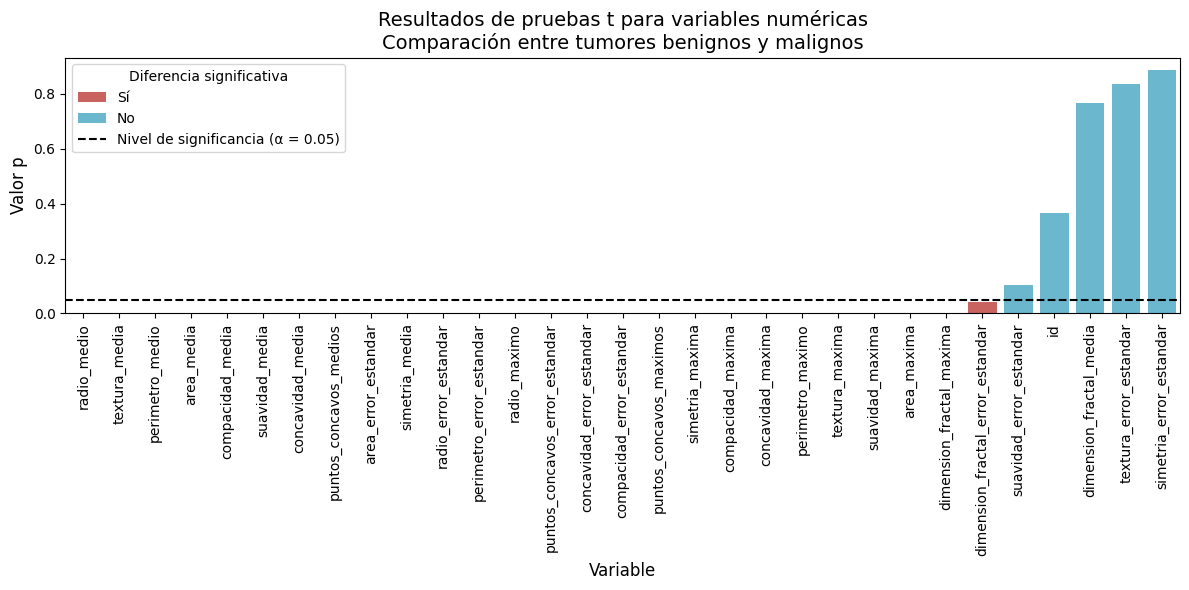

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear columna booleana (1 si hay diferencia significativa, 0 si no)
tabla_resultados['Significativo'] = tabla_resultados['Diferencia_significativa'].apply(lambda x: 1 if x == "Sí" else 0)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12,6))

# Gráfico de barras ordenado por valor p
sns.barplot(
    data=tabla_resultados.sort_values(by='valor_p'),
    x='Variable',
    y='valor_p',
    hue='Diferencia_significativa',
    palette={'Sí':'#d9534f', 'No':'#5bc0de'}
)

# Línea de referencia en p = 0.05
plt.axhline(0.05, color='black', linestyle='--', label='Nivel de significancia (α = 0.05)')

# Títulos y etiquetas
plt.title('Resultados de pruebas t para variables numéricas\nComparación entre tumores benignos y malignos', fontsize=14)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Valor p', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Diferencia significativa')

plt.tight_layout()
plt.show()


### Interpretación del Gráfico de Valores p (Pruebas t de Student)

El gráfico muestra el resultado de una prueba de hipótesis (t de Student) para cada variable, donde la hipótesis nula ($H_0$) es que no existe diferencia significativa en la media de la variable entre los tumores benignos y malignos.El valor p es la probabilidad de observar la diferencia de medias actual (o una más extrema) si $H_0$ fuera verdadera.

1. **El Nivel de Significancia ($\alpha = 0.05$)**

    La línea de referencia en $p = 0.05$ (la línea discontinua negra) es el umbral.

* Si $p < 0.05$ (Barra Roja): Se rechaza la $H_0$. Concluimos que existe una diferencia estadísticamente significativa entre las medias de la variable para los tumores benignos y malignos.

* Si $p \ge 0.05$ (Barra Azul): Se falla en rechazar la $H_0$. Concluimos que no hay suficiente evidencia para afirmar que las medias son diferentes.

2. **Variables con Diferencia Altamente Significativa** ($p \ll 0.05$)


###Analisis Regresion logistica

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# ==============================================================================
# 1. Preparación de la Variable Dependiente (Y)
# ==============================================================================

COLUMNA_DIAGNOSTICO = 'diagnostico' #
VALOR_MALIGNO = 'Maligno'
VALOR_BENIGNO = 'Benigno'
# Codificación binaria: 1 para Maligno, 0 para Benigno
df_cleaned['Y_binaria'] = df_cleaned[COLUMNA_DIAGNOSTICO].map({VALOR_MALIGNO: 1, VALOR_BENIGNO: 0})


# ==============================================================================
# 2. Selección de Variables Predictoras (X)
# ==============================================================================

# Variables con 'Diferencia Significativa' (p < 0.05) del diagrama de barras
variables_predictoras = [
    'radio_medio',
    'textura_media',
    'perimetro_medio',
    'area_media',
    'suavidad_media',
    'compacidad_media',
    'concavidad_media',
    'puntos_concavos_medios',
    'simetria_media',
    'dimension_fractal_media',
    'radio_maximo',
    'area_maxima',
    'perimetro_maximo',
    'concavidad_maxima'

]

X = df_cleaned[variables_predictoras]
Y = df_cleaned['Y_binaria']


# ==============================================================================
# 3. Separación de Datos (Práctica de Machine Learning)
# ==============================================================================

# 70% para entrenamiento, 30% para prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


# ==============================================================================
# 4. Modelo de Regresión Logística (Logit)
# ==============================================================================

# 4.1 Añadir la constante (intercepto)
X_train_con_constante = sm.add_constant(X_train)

# 4.2 Crear y ajustar (entrenar) el modelo Logit
modelo_logistico = sm.Logit(Y_train, X_train_con_constante).fit()

# 4.3 Mostrar el resumen estadístico
print("="*60)
print("       RESUMEN DEL MODELO DE REGRESIÓN LOGÍSTICA (LOGIT)")
print("="*60)
print(modelo_logistico.summary())


# ==============================================================================
# 5. Cálculo e Interpretación de Odds Ratios
# ==============================================================================

# Calcular Odds Ratios (OR) elevando el coeficiente a la potencia de 'e' (np.exp)
odds_ratios = pd.DataFrame(
    {'Coeficiente (Log Odds)': modelo_logistico.params,
     'Odds Ratio (e^Coef)': np.exp(modelo_logistico.params),
     'P-Value': modelo_logistico.pvalues}
)

# Eliminar la constante de la tabla para enfocarse en las variables
odds_ratios = odds_ratios.drop('const')

# Ordenar por Odds Ratio para mejor visualización
odds_ratios = odds_ratios.sort_values(by='Odds Ratio (e^Coef)', ascending=False)

print("\n" + "="*60)
print("             ANÁLISIS DE ODDS RATIOS (OR) Y P-VALUES")
print("="*60)
print(odds_ratios)


print("\n--- Interpretación Rápida de Odds Ratios ---")
print("1. Si OR > 1.0 y P-Value < 0.05: La variable es predictora significativa de MALIGNIDAD (Y=1).")
print("2. Si OR < 1.0 y P-Value < 0.05: La variable es predictora significativa de BENIGNIDAD (Y=0).")
print("3. Si P-Value >= 0.05: La variable NO es un predictor significativo dentro del modelo.")

Optimization terminated successfully.
         Current function value: 0.062989
         Iterations 13
       RESUMEN DEL MODELO DE REGRESIÓN LOGÍSTICA (LOGIT)
                           Logit Regression Results                           
Dep. Variable:              Y_binaria   No. Observations:                  398
Model:                          Logit   Df Residuals:                      383
Method:                           MLE   Df Model:                           14
Date:                Thu, 23 Oct 2025   Pseudo R-squ.:                  0.9047
Time:                        02:04:51   Log-Likelihood:                -25.070
converged:                       True   LL-Null:                       -263.17
Covariance Type:            nonrobust   LLR p-value:                 1.016e-92
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   

### Modelo predictivo de diagnóstico de cáncer de mama

Columnas disponibles en el dataset:
['id', 'diagnostico', 'radio_medio', 'textura_media', 'perimetro_medio', 'area_media', 'suavidad_media', 'compacidad_media', 'concavidad_media', 'puntos_concavos_medios', 'simetria_media', 'dimension_fractal_media', 'radio_error_estandar', 'textura_error_estandar', 'perimetro_error_estandar', 'area_error_estandar', 'suavidad_error_estandar', 'compacidad_error_estandar', 'concavidad_error_estandar', 'puntos_concavos_error_estandar', 'simetria_error_estandar', 'dimension_fractal_error_estandar', 'radio_maximo', 'textura_maxima', 'perimetro_maximo', 'area_maxima', 'suavidad_maxima', 'compacidad_maxima', 'concavidad_maxima', 'puntos_concavos_maximos', 'simetria_maxima', 'dimension_fractal_maxima', 'Y_binaria'] 

✅ Columna de diagnóstico detectada automáticamente: diagnostico
Valores únicos detectados: ['Maligno' 'Benigno']

🔹 Precisión del modelo: 100.00%

🔹 Reporte de Clasificación:

              precision    recall  f1-score   support

           0   

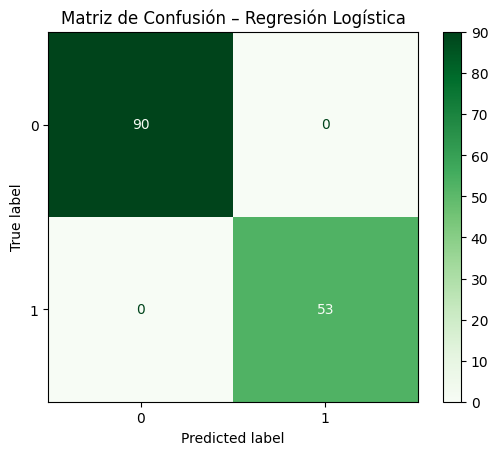

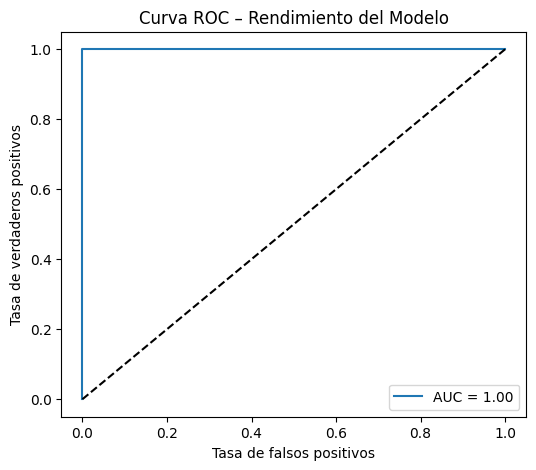

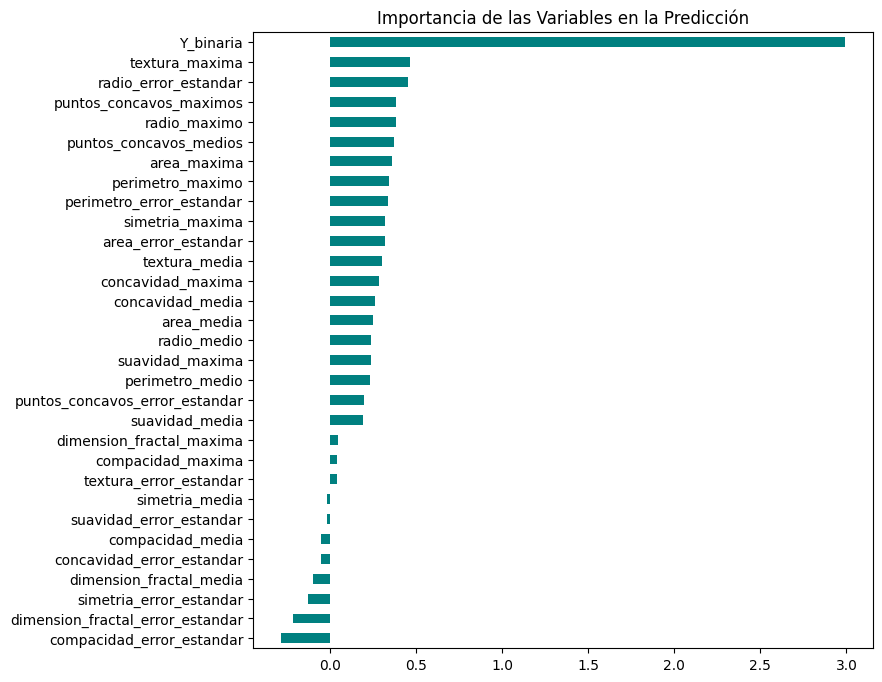

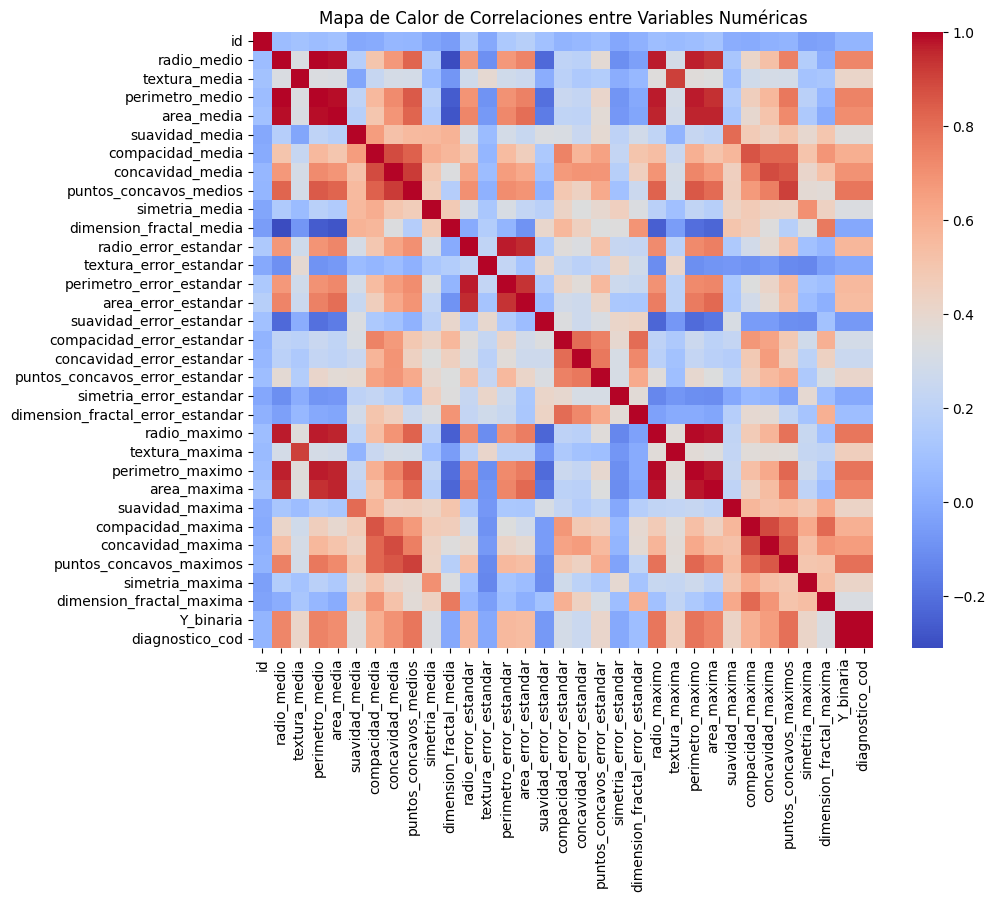

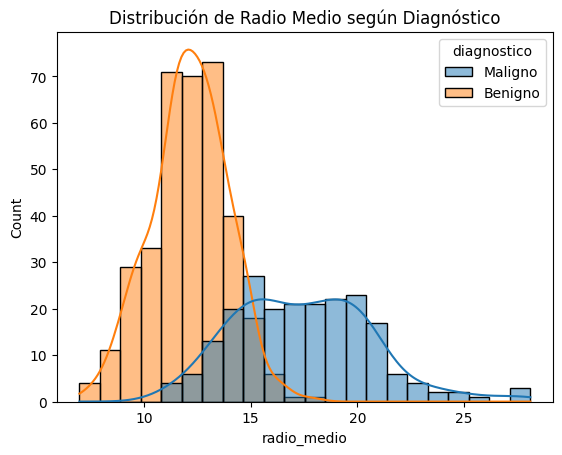

In [ ]:
# ============================================================
# 🔬 MODELO PREDICTIVO DE CÁNCER DE MAMA – REGRESIÓN LOGÍSTICA
# ============================================================

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_curve, auc
)

# ============================================================
# 1️⃣ DETECCIÓN AUTOMÁTICA DE COLUMNA DE DIAGNÓSTICO
# ============================================================
print("Columnas disponibles en el dataset:")
print(df_cleaned.columns.tolist(), "\n")

# Detectar nombre de columna que contenga "diagn" (diagnóstico/diagnosis)
col_diagnostico = None
for col in df_cleaned.columns:
    if "diagn" in col.lower():  # busca 'diagn' en minúsculas
        col_diagnostico = col
        break

if col_diagnostico is None:
    raise KeyError("No se encontró una columna de diagnóstico (ej. 'diagnostico' o 'diagnosis')")

print(f"✅ Columna de diagnóstico detectada automáticamente: {col_diagnostico}")

# ============================================================
# 2️⃣ Codificar variable objetivo: 1 = Maligno, 0 = Benigno
# ============================================================
# Detección automática de etiquetas (M/B o Maligno/Benigno)
valores_unicos = df_cleaned[col_diagnostico].unique()
print(f"Valores únicos detectados: {valores_unicos}")

# Ajuste automático según idioma o formato
if 'M' in valores_unicos or 'B' in valores_unicos:
    df_cleaned['diagnostico_cod'] = df_cleaned[col_diagnostico].map({'M': 1, 'B': 0})
else:
    df_cleaned['diagnostico_cod'] = df_cleaned[col_diagnostico].map({'Maligno': 1, 'Benigno': 0})

# ============================================================
# 3️⃣ Separar variables predictoras (X) y objetivo (y)
# ============================================================
X = df_cleaned.drop(columns=['id', col_diagnostico, 'diagnostico_cod'], errors='ignore')
y = df_cleaned['diagnostico_cod']

# ============================================================
# 4️⃣ División de datos y escalado
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================================
# 5️⃣ Entrenamiento del modelo predictivo
# ============================================================
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

# ============================================================
# 6️⃣ Evaluación del modelo
# ============================================================
y_pred = log_model.predict(X_test_scaled)
y_pred_prob = log_model.predict_proba(X_test_scaled)[:, 1]

precision = accuracy_score(y_test, y_pred)
print(f"\n🔹 Precisión del modelo: {precision*100:.2f}%\n")

print("🔹 Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))

# ============================================================
# 7️⃣ Gráficos de evaluación
# ============================================================

# Matriz de confusión
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Greens')
plt.title("Matriz de Confusión – Regresión Logística")
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC – Rendimiento del Modelo")
plt.legend()
plt.show()

# Importancia de variables
importances = pd.Series(log_model.coef_[0], index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 8), color='teal')
plt.title("Importancia de las Variables en la Predicción")
plt.show()

# Heatmap de correlaciones
# Select only numeric columns for correlation calculation
numeric_df = df_cleaned.select_dtypes(include=np.number)
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Mapa de Calor de Correlaciones entre Variables Numéricas")
plt.show()

# Histograma de Radio Medio por diagnóstico (if exists)
if 'radio_medio' in df_cleaned.columns:
    sns.histplot(data=df_cleaned, x='radio_medio', hue=col_diagnostico, kde=True)
    plt.title("Distribución de Radio Medio según Diagnóstico")
    plt.show()